# Final Project
## CMSC 641
#### Created by Evan Dowling

## Getting Accepted into Physics Graduate School:

### Outline
1. Introduction
2. Data Collection
3. Data Storage and Cleaning
4. Data Exploration and Analysis
5. Conclusion

### Introduction
For most physics undergraduate students hoping to get into graduate school, they often wonder what it takes for them to get into certain programs. Luckily a back in 2009 a website, www.physicsgre.com, created a forum where its viewers could post their academic profile and update where they got accepted and rejected. Since then a new forum has been created every year where students update where they have been accepted and rejected. With 10 years of data on the website I have yet to find accumulated statistics of the data. 

The objective of this project is to scrape all the data on the website and analyze its trends. We want to determine what is the strongest indicator to get accepted into the nations top 25 programs: GPA, certain test scores, etc. And how do scores and acceptances vary across different populations of people: men, women, domestic, international, etc.

Also because Maryland made the list it would be interesting to see how the University of Maryland compares to its competitors. 

The top 25 physics schools given by US News are in order:

    1) MIT, Stanford

    3) Caltech, Harvard University, Princeton, Univ of California-Berkeley

    7) Cornell University, Univ of Chicago

    9) Univ of Illinois-Urbana-Champaign

    10) Columbia University, Univ of California-Santa Barbara

    12) Yale University

    13) Univ of Michigan-Ann Arbor

    14) Univ of Colorado-Boulder, Univ of Maryland-College Park, Univ of Pennsylvania

    17) Johns Hopkins University, Univ of California-Los Angeles, Univ of California-San Diego, Univ of Texas-Austin, Univ of Wisconsin-Madision

    22) Univ of Washington

    23) Ohio State University, Stony Brook University

    25) Northwestern University, Pennsylvania State University, Univ of Minnesota


### Data Collection
Extracting the relevant information from completely unformatted text from hundreds of entries each year would be challanging. Luckily for us, every forum entry by a user was expected to follow a consistent formula specified by the first post from every year. This form remained largley unchanged over the years:

______________________________________________
    [b]Undergrad Institution[/b]: (School or type of school, such as big state, lib arts, ivy, technical, foreign (what country?)... Overall Reputation in Physics?)

    [b]Major(s)[/b]:

    [b]Minor(s)[/b]:

    [b]GPA in Major[/b]:

    [b]Overall GPA[/b]:

    [b]Length of Degree[/b]: (Are you graduating after 3, 4, or 5 years?)

    [b]Position in Class[/b]: (No numbers needed, but are you top? near top? average? struggling?)

    [b]Type of Student[/b]: (Domestic/International, male/female, minority?)

    [b]GRE Scores [/b]: (revised or old version?)
    [b]Q[/b]:

    [b]V[/b]:

    [b]W[/b]:

    [b]P[/b]:

    [b]TOEFL[/b]: ([b]R[/b]: , [b]L[/b]: , [b]S[/b]: , [b]W[/b]: )

    [b]Research Experience[/b]: (At your school or elsewhere? What field? How much time? Any publications (Mth author out of N?) or conference talks etc...)

    [b]Awards/Honors/Recognitions[/b]: (Within your school or outside?)

    [b]Pertinent Activities or Jobs[/b]: (Such as tutor, TA, SPS officer etc...)

    [b]Any Miscellaneous Accomplishments that Might Help[/b]:

    [b]Special Bonus Points[/b]: (Such as connections, grad classes, famous recommenders, female or minority status etc...)

    [b]Any Other Info That Shows Up On Your App and Might Matter[/b]:

    [b]Applying to Where[/b]:

    [u]School[/u] - Department - Research Interest (Feb. 28: WILL ATTEND for Ph.D. Accepted via website/email + Fellowship + TA)

    [u]School[/u] - Department - Research Interest (Feb. 14: ACCEPTED for Ph.D via website/email + Fellowship + month TA)

    [u]School[/u] - Department - Research Interest (Feb. 23: Rejected via website/emai)

______________________________________________

For the most part user's follwed this format. For users who fail to exactly follow this format the answers to their questions will be blank. Since most followed it exactly and there are over 100 responses per year, the data reduction shouldn't be to critical to our final statistics. 

The goal of the data collection process is to extract all of the relevant data from the forums website and store it in panda dataFrames that we can later use and analyze. 



In [1]:
#Packages used:               
import numpy as np                 # Numerical package
import pandas as pd                # workhorse module for data science built off numpy functionality 
import requests                    # queries html code from internet
from bs4 import BeautifulSoup      # used to clean up html 
import re                          # regular expressions:  used to preform searches, splits, and operations on strings
#Plotting packages:
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Query website:

#All forms had three pages of entries (>100 number of responses per year):
#Note: The print view was used as it had a simpler html format
url2009 = ['http://www.physicsgre.com/viewtopic.php?f=3&t=1847&start=1&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=1847&start=51&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=1847&start=101&view=print'] 
url2010 = ['http://www.physicsgre.com/viewtopic.php?f=3&t=2824&start=1&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=2824&start=51&view=print',
           'http://www.physicsgre.com/viewtopic.php?f=3&t=2824&start=101&view=print']
url2011 = ['http://www.physicsgre.com/viewtopic.php?f=3&t=3421&start=1&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=3421&start=51&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=3421&start=101&view=print']
url2012 = ['http://www.physicsgre.com/viewtopic.php?f=3&t=4274&start=1&view=print',
           'http://www.physicsgre.com/viewtopic.php?f=3&t=4274&start=51&view=print',
           'http://www.physicsgre.com/viewtopic.php?f=3&t=4274&start=101&view=print']
url2013 = ['http://www.physicsgre.com/viewtopic.php?f=3&t=4669&start=1&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=4669&start=51&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=4669&start=101&view=print']
url2014 = ['http://www.physicsgre.com/viewtopic.php?f=3&t=5203&start=1&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=5203&start=51&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=5203&start=101&view=print']
url2015 = ['http://www.physicsgre.com/viewtopic.php?f=3&t=5572&start=1&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=5572&start=51&view=print'
          'http://www.physicsgre.com/viewtopic.php?f=3&t=5572&start=101&view=print']
url2016 = ['http://www.physicsgre.com/viewtopic.php?f=3&t=6128&start=1&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=6128&start=51&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=6128&start=101&view=print']
url2017 = ['http://www.physicsgre.com/viewtopic.php?f=3&t=6459&start=1&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=6459&start=51&view=print',
          'http://www.physicsgre.com/viewtopic.php?f=3&t=6459&start=101&view=print']
url2018 = ['http://www.physicsgre.com/viewtopic.php?f=3&t=99428&start=1&view=print',
           'http://www.physicsgre.com/viewtopic.php?f=3&t=99428&start=51&view=print',
           'http://www.physicsgre.com/viewtopic.php?f=3&t=99428&start=101&view=print']

url = url2018+url2017+url2016+url2015+url2014+url2013+url2012+url2011+url2010+url2009

#Grab all HTML content:
pages = [ BeautifulSoup(requests.get(page).content, "html.parser")
                for page in url ]


To get an idea of how to extract data from each of these pages it is nice to view the raw HTML code, to see how it is structured and where the relevant content is.

In [3]:
#Visualizing a html segment for the first page:
print(str(pages[0].prettify())[0:1000])

<!DOCTYPE html>
<html dir="ltr" lang="en-gb">
 <head>
  <meta charset="utf-8"/>
  <meta content="noindex" name="robots"/>
  <title>
   Physics GRE Discussion Forums • 2018 Applicant Profiles and Admission Results - Page 1
  </title>
  <link href="./styles/prosilver/theme/print.css" rel="stylesheet" type="text/css"/>
 </head>
 <body id="phpbb">
  <div id="wrap">
   <a accesskey="t" class="anchor" id="top">
   </a>
   <div id="page-header">
    <h1>
     Physics GRE Discussion Forums
    </h1>
    <p>
     (This resource is NOT affiliated with gre.org or ets.org)
     <br/>
     <a href="http://www.physicsgre.com/">
      http://www.physicsgre.com/
     </a>
    </p>
    <h2>
     2018 Applicant Profiles and Admission Results
    </h2>
    <p>
     <a href="http://www.physicsgre.com/viewtopic.php?f=3&amp;t=99428">
      http://www.physicsgre.com/viewtopic.php?f=3&amp;t=99428
     </a>
    </p>
   </div>
   <div id="page-body">
    <div class="page-number">
     Page
     <strong>
      1

In [4]:
def isNum(num):
    #Find if a str is a number or something else
    try:
        float(num)
        return True
    except: return False

In [5]:
#Looping through pages to find authors and their content:
year = []
authors = []
content = []
for page in pages:
    #Finding the year of the post
    yr = page.find('h2').string.split()
    yr = [y for y in yr if isNum(y)==True]
    
    #Grabbing all author names and content from author on a given page
    auth = page.findAll('div','author')
    cont = page.findAll('div','content')
    
    #turning these bs4 elements into strings:
    for i,el in enumerate(auth):
        authors.append(str(el))
        content.append(str(cont[i]))
        year.append(yr[0])

In [6]:
#Removing all html tags from content and authors:
#Using both regular expressions and built in python string functionality:
authors = [re.sub('<[^<]+?>', '', el) for el in authors]  #finds and removes all "< blah >" strings
authors = [el.replace("by ","") for el in authors]        #finds and removes all begining "by " within author

content = [re.sub('<br/>','\n ',el) for el in content]    #replaces html enters syntax with string enter syntax
content = [re.sub('<[^<]+?>', '', el) for el in content]  #removes all other "< blah >" strings

In [7]:
#Looking at the first entry in 2018:
print(year[0],' ',authors[0],'\n',content[0][0:4000],'...')

2018   yeshuamo 
 Undergrad Institution: Current bachelor's: Large state school, OK physics, spectacular astronomy. First bachelor's: top-30 large private university.
 Major(s): Physics. First degree: Business and English.
 Minor(s): Math.
 GPA in Major:
 Overall GPA: 3.72, magna cum laude (Latest degree), 3.47 (First degree)
 Length of Degree: (Are you graduating after 3, 4, or 5 years?) 2.5 + 4 for the first bachelor's
 Position in Class: ~90%
 Type of Student: Domestic white female
 
 GRE Scores :
 Q: 161 (88%)
 V: 164 (87%)
 W: 5.5 (98%) (yes mom, you read that right)
 P:  attempt 1: 580 (24%), attempt 2: 670 (44%)
 
 
 Research Experience:
 2+ years with the same professor in Cosmology (my entire time I've been in school for physics)
 1 year in computational astrophysics (concurrent with the above while it lasted) 
 1 year + in experimental biophysics (hello) (concurrent with the two projects above)
 1 REU in computational radio astronomy
 1 REU in cosmology (computational and ins

##### Beginning information extraction from content of each user

In [8]:
#In order for regular expressions to find correct content we need to erase new line commands.
#The new line commands was kept above to make the visual output better.
content = [re.sub('\n','',el) for el in content]   #replaces html enters syntax with string enter syntax

In [9]:
#Each of their answers must be strickly after each of these exact headings:
Headings = ["Undergrad Institution:","Major\(s\):","Minor\(s\):","GPA in Major:",
            "Overall GPA:","Length of Degree:","Position in Class:","Type of Student:",
            "GRE Scores :","Q:","V:","W:","P:","Research Experience:",
            "Awards/Honors/Recognitions:","Pertinent Activities or Jobs:",
            "Any Miscellaneous Accomplishments that Might Help:",
            "Special Bonus Points:","Applying to Where:"]

Creating a sublist of each response to the headings listed above for every user. 

Note: Due to a copy and paste error the "GRE Scores :" has changed over the years. Sometimes it is "GRE Scores:" other times it is "GRE Scores :" . To compensate for the error we must check to see which one each poster used.

In [10]:
#looping through the content from each user:
userans = []  #user answers -> array of arrays
for i,cont in enumerate(content):
    # Flag for varying GRE Score formats
    if "GRE Scores:" in cont:
        Headings[8] = "GRE Scores:"

    if "GRE Scores :" in cont:
        Headings[8] = "GRE Scores :"
    #looping through the headings:
    answer=[]
    for j,h in enumerate(Headings):
        #Creating re pattern to look for content between two adjacent headings
        if j<(len(Headings)-1):
            pattern = h+'(.*)'+Headings[j+1]
        else:
            pattern = h+'(.*)'
        #Testing out if this pattern exists
        #Note: if it doesn't user failed to use the exact formula given within forum
        try:
            ans = re.search(pattern, cont)    #re expression search for text between two headings
            ans = ans.group(1)                #only text between two headings - not including headings
            ans = ans.lower()                 #lowercase the content -> eases comparison
            answer.append(ans)      
        except:
            # To keep arrays equal length insert blank string
            answer.append("")
            pass   
    #updating user answer list with the list of answers to each heading: 
    userans.append(answer)


### Data Storage and Cleaning
Now we have a list of all of the users resonses, which are a list of strings consisting of their answer to each of the headings, we can now pick out the relevant data we want to store and analyze. We want to keep all numerical data: {GPA, GRE scores for the quantitative, verbal, and written parts, length of degree} as these can be easily used to analyse the correlation between different groups of people and their chance of being accepted or declined from the top physics schools. 

In [11]:
top25sch = ["MIT","Stan","CalTech","Harv","Princ","UCB","Corn",
           "UChic","UIUC","Columbia","UCSB","Yale","UMich","UCBoul",
            "UMD","UPenn","JHopk","UCLA","UCSD","UTex","UWMad","UWash",
            "OSU","Stony","NW","PSU","UMinn"]

#### School Acceptance:
Every person didn't use the same name tag for these schools so I manually searched through the forum to determine common variants to the all of the top 25 schools.

In [12]:
#identifiers for each school:
MIT = ['mit','massachusetts institute of technology']
Stan = ['stanford']
Caltech = ['caltech','california institue of technology']
Harv = ['harvard']
Princ = ['princeton']
UCB = ['ucb','berkeley']
Corn = ['cornell']
UChic = ['chicago']
UIUC = ['uiuc','urbana']
Columbia = ['columbia']
UCSB = ['ucsb','uc santa barbara','univ of california santa barbara',
        'university of california santa barbara']
Yale = ['yale']
UMich = ['michigan','ann arbor']
UCBoul = ['university of colorado','univ of colorado','boulder']
UMD = ['umd','u maryland','univ of maryland','college park','maryland/jqi']
UPenn = ['upenn', 'university of pennsylvania','univ of pennsylvania']
JHopk = ['hopkins']
UCLA = ['ucla', 'los angeles']
UCSD = ['ucsd','uc san diego','univ of california san diego',
        'university of california san diego']
UTex = ['austin','university of texas','univ of texas']
UWMad = ['madison','wisconsin']
UWash = ['university of washington','seattle',]
OSU = ['osu','ohio state']
Stony = ['stony brook']
NW = ['northwestern']
PSU = ['penn state', 'pennsylvania state','psu']
UMinn = ['minnesota','twin cities']

#Storing all flags in a list
top25flags = [MIT,Stan,Caltech,Harv,Princ,UCB,Corn,UChic,UIUC,Columbia,UCSB,Yale,
              UMich,UCBoul,UMD,UPenn,JHopk,UCLA,UCSD,UTex,UWMad,UWash,OSU,Stony,
              NW,PSU,UMinn]

There are potential problems with this route. Since the names of the schools weren't standardized we have potential problems. The schools names could be incorrectly spelled. Under this method we'll lose those data points. The University of Michigan data will be off as it was commonly listed as just "Michigan", but a flag of just "Michigan" would also be triggered by Michigan State University which gets a large number of applicants due to its hightly respected experimental particle physics program. To counter this problem we'll have to treat Michigan specially and check following words for "state". 

To identify if someone got accepted or rejected we will look within the next few words after those top 25 schools for those key words.

In [13]:
def decision(school,cont,wrdcnt):
    """
    school - list of strings that are flags for a specific school
    cont   - user's text content
    wrdcnt - number of words to look beyond school flag
    
    Function: 
    Returns True, False, or np.nan depending on whether a person was accepted or rejected
    from a school that was found to be on their list of schools
    
    -True if accepted words are found following the school name
    -False if rejected words are found following the school name
    -np.nan if no words are found
     
    Idea:
    Looks at next [wrdcnt] # of words to see if they stated acceptance or rejection
    """
    
    #list of words meaning acceptance:
    acc = ["accept","admitted"]
    #Rejection:
    dec = ["reject"]
    
    #splits all the content into an ordered list of words
    words = cont.split()  
    
    #finds school id that was used
    for flag in school:
        if flag in cont:   #found the correct school flag    
            flagwrds = flag.split()
            fllw = flagwrds[-1]    #last word in correct school flag
            
            ### Special michigan state catcher
            if flag=='michigan':
                try:
                    next_word = words[words.index(fllw)+1]
                except: 
                    return np.nan #no words left in response -> user didn't respond
                #found michigan state instead of univ of michigan
                if next_word == 'state': 
                    return np.nan
            
    #looking at following words defined by wrdcnt
    for i in range(wrdcnt):
        #make sure we aren't at the end of content which will break code:
        try:
            next_word = words[words.index(fllw)+i+1]
            #test for acceptance:
            for el in acc:
                if el in next_word: return True
            #test for rejection:
            for el in dec:
                if el in next_word: return False
        except:
            #hit the end of the content without getting a valid response
            return np.nan
    #didn't find a valid answer
    return np.nan

In [14]:
#Finding where users get accepted:
userstop25 = []
#loop through users
for i,user in enumerate(userans):
    cont = user[-1]  #grabs just school response
    #looping though top 25 schools
    top25 = []
    for j,school in enumerate(top25flags):
        # looks for any of the school ids within users response
        if True in [el in cont for el in school]:
            top25.append(decision(school,cont,10))   # look for accept/reject in next N words
        else:
            #School wasn't found
            top25.append(np.nan)
            
    #appending the users total acceptance/rejection results into big list
    userstop25.append(top25)

In [15]:
#creating pandas dataframe to store data
stats = pd.DataFrame(userstop25)
stats.columns = top25sch   #assigning column names

Taking a look at the first entry's acceptance results:

In [16]:
print(stats.loc[0])

MIT           NaN
Stan        False
CalTech       NaN
Harv        False
Princ       False
UCB         False
Corn          NaN
UChic       False
UIUC          NaN
Columbia      NaN
UCSB          NaN
Yale         True
UMich        True
UCBoul        NaN
UMD           NaN
UPenn         NaN
JHopk         NaN
UCLA          NaN
UCSD          NaN
UTex          NaN
UWMad         NaN
UWash         NaN
OSU           NaN
Stony         NaN
NW            NaN
PSU           NaN
UMinn         NaN
Name: 0, dtype: object


Here the Michigan problem is seen explicitly. The user got accepted into the Univ of Michigan. However, if you see their HTML output that was printed out above, you'll see they labeled the school as just "Michigan", and we were able to correctly classify it as such.

#### Test scores, GPA, Gender, Interenational Status

Going through the data for users' GPA, test scores, gender, and international status. This is done similary to above. Looking at the next few words after the heading and grabbing the information that makes sense.

In [17]:
def numfinder(cont,flag,year):
    """
    Finds the number that would be expected for a given flag.
    
    First it finds all numbers and sorts them in decending order.
    
    We expect to find:
        -GPAs in range [0,4.0]
        -GRE Quant and Verbal scores in range [0,180] or [200,800] 
        -GRE Written in range [0,6]
        -Physics GRE in range [200,990]
    
    """
    
    #Grab just the numers:
    cont = cont.replace(",","")  #remove commas
    numbs = [float(num) for num in cont.split() if isNum(num)==True]
    #no numbers found:
    if numbs == []: return np.nan       
    numbs = sorted(numbs, reverse=True)  #highest numbers first -> more impressive scores
    
    year = float(year)
    #check to see if GPA is in the GPA range - if not ignore
    if (flag=="mgpa" or flag=='gpa'):
        for num in numbs:
            if (num>0.0 and num<4.1):
                return num
        return np.nan
    
    #check to see if GRE scores is in right range - if not ignore
    if (flag=='qscr' or flag=='vscr'):
        for num in numbs:
            if year < 2013:
                if (num>200.0 and num<800.1):
                    return num
            else:
                if (num>0.0 and num<180.1):
                    return num
        return np.nan
    
    #check to see if GRE written scores is in right range - if not ignore
    if (flag=='wscr'):
        for num in numbs:
            if (num>0.0 and num<6.1):
                return num
        return np.nan
    
    #check to see if Physics GRE written scores is in right range - if not ignore
    if (flag=='pscr'):
        for num in numbs:
            if (num>200.0 and num<991):
                return num
        return np.nan

In [18]:
def gender(cont):
    """Looking for male of female words in student description to determine users gender"""
    
    male = ['male','guy','boy','man']
    female = ['female','woman','girl']
    
    cont = cont.split()
    for m in male:
        if (True in [m == word for word in cont]):
            return "M"
    for f in female:
        if (True in [f == word for word in cont]):
            return "F"
    #didn't find anything
    return np.nan

In [19]:
def domestic(cont):
    """Determining Domestic or International Student"""
    
    domestic = ['domestic','american']
    inter = ['international','foreign']
    
    cont = cont.split()
    for d in domestic:
        if (True in [d == word for word in cont]):
            return "D"
    for i in inter:
        if (True in [i == word for word in cont]):
            return "I"
    #didn't find anything
    return np.nan

In [20]:
#looping through user's responses:
userarr = []
for i,ans in enumerate(userans):
    mgpa = ans[3]    #major gpa
    gpa = ans[4]     #overal gpa
    sttype = ans[7]  #type of student
    qscr = ans[9]    #quantitative GRE score
    vscr = ans[10]   #verbal GRE score
    wscr = ans[11]   #written GRE score
    pscr = ans[12]   #physics subject exam score
    
    # temporary array used to store answers from each person
    arr = [numfinder(mgpa,'mgpa',year[i]),numfinder(gpa,'gpa',year[i]),
           numfinder(qscr,'qscr',year[i]),numfinder(vscr,'vscr',year[i]),
           numfinder(wscr,'wscr',year[i]),numfinder(pscr,'pscr',year[i]),
           gender(sttype),domestic(sttype),authors[i],year[i]]             
    #appending the users total statistics
    userarr.append(arr)
    

In [21]:
#Adding data to pandas dataFrame
df = pd.DataFrame(userarr, columns=['MGPA','GPA','Q','V','W','P','Gender','Dom','User_Name','Year'])
#Merging
stats = stats.join(df)
#reordering column names:
columNames = ['Year','User_Name','GPA','MGPA','Q','V','W','P','Gender','Dom']+top25sch
stats = stats[columNames]
stats.head(10)     #view the first 10

,Year,User_Name,GPA,MGPA,Q,V,W,P,Gender,Dom,...,UCLA,UCSD,UTex,UWMad,UWash,OSU,Stony,NW,PSU,UMinn
0,2018,yeshuamo,3.72,NaN,161.0,164.0,5.5,670.0,F,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,911876gev,3.92,3.89,167.0,164.0,5.0,820.0,F,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,neurotal,3.61,3.54,162.0,165.0,5.0,750.0,M,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,albuser,3.95,4.00,170.0,166.0,4.0,950.0,M,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,lizphys,3.30,4.00,162.0,165.0,4.0,NaN,F,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,sam1608,NaN,NaN,157.0,150.0,3.5,700.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,confromotron,3.65,3.72,163.0,160.0,3.5,900.0,NaN,D,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,Byzantium1453,3.40,3.50,164.0,170.0,6.0,830.0,M,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,JAY,3.78,3.80,164.0,161.0,4.5,620.0,M,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,Supratik Sarkar,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#view the last 10 entries:
stats.tail(10)

,Year,User_Name,GPA,MGPA,Q,V,W,P,Gender,Dom,...,UCLA,UCSD,UTex,UWMad,UWash,OSU,Stony,NW,PSU,UMinn
1272,2009,FNR,3.76,3.76,NaN,NaN,NaN,660.0,NaN,I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1273,2009,babazula,NaN,NaN,800.0,600.0,6.0,900.0,NaN,I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1274,2009,volcano,3.63,3.78,770.0,360.0,3.0,790.0,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False
1275,2009,per,3.83,3.93,800.0,750.0,5.5,990.0,M,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1276,2009,Perseid,3.31,3.34,710.0,540.0,4.0,570.0,F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1277,2009,Quakes,3.90,3.97,800.0,700.0,6.0,990.0,NaN,I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1278,2009,tiyusufaly,3.71,3.75,800.0,660.0,5.0,880.0,M,D,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1279,2009,mako,2.90,2.90,800.0,740.0,4.0,740.0,M,D,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
1280,2009,kerolau,3.72,3.79,800.0,350.0,3.0,990.0,M,I,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1281,2009,shetanak13,2.90,2.90,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,True


## Data Exploration and Analysis

### Question 1) What is the signficance of GPA and test scores on admission?

Now that we have successfully scrapped the data from the website from 2009-18 lets look at how test scores and GPA impact acceptance.

It is thought that one's GPA, quantitative GRE score, and the physics subject exam score are the three important quantities for admission, but your verbal and written scores have only to be "high" enough and anything higher doesn't help out. Let's see if that is seen in acceptance/rejection data. If one of these stats is important we'd expect to see a seperation in average accepted persons score verses an average rejected person. 

In [23]:
#Grabbing entries for schools that aren't empty:
MIT =stats[stats["MIT"].isnull()==False]
Stan = stats[stats["Stan"].isnull()==False]
CalTech = stats[stats["CalTech"].isnull()==False]
Harv = stats[stats["Harv"].isnull()==False]
Princ = stats[stats["Princ"].isnull()==False]
UCB = stats[stats["UCB"].isnull()==False]
Corn = stats[stats["Corn"].isnull()==False]
UChic = stats[stats["UChic"].isnull()==False]
UIUC = stats[stats["UIUC"].isnull()==False]
Columbia = stats[stats["Columbia"].isnull()==False]
UCSB = stats[stats["UCSB"].isnull()==False]
Yale = stats[stats["Yale"].isnull()==False]
UMich = stats[stats["UMich"].isnull()==False]
UCBoul = stats[stats["UCBoul"].isnull()==False]
UMD = stats[stats["UMD"].isnull()==False]
UPenn = stats[stats["UPenn"].isnull()==False]
JHopk = stats[stats["JHopk"].isnull()==False]
UCLA = stats[stats["UCLA"].isnull()==False]
UCSD = stats[stats["UCSD"].isnull()==False]
UTex = stats[stats["UTex"].isnull()==False]
UWMad = stats[stats["UWMad"].isnull()==False]
UWash = stats[stats["UWash"].isnull()==False]
OSU = stats[stats["OSU"].isnull()==False]
Stony = stats[stats["Stony"].isnull()==False]
NW = stats[stats["NW"].isnull()==False]
PSU = stats[stats["PSU"].isnull()==False]
UMinn = stats[stats["UMinn"].isnull()==False]

#school dataFrames
schlDF = [MIT,Stan,CalTech,Harv,Princ,UCB,Corn,UChic,UIUC,Columbia,UCSB,Yale,
              UMich,UCBoul,UMD,UPenn,JHopk,UCLA,UCSD,UTex,UWMad,UWash,OSU,Stony,
              NW,PSU,UMinn]

In [24]:
# Average and STD of GPA and exams scores for top schools
accepted_ave = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])
accepted_std = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])
rejected_ave = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])
rejected_std = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])

for i,schl in enumerate(schlDF):
    #accepted people:
    schl_a = schl[schl[top25sch[i]]==True]
    #rejected people:
    schl_r = schl[schl[top25sch[i]]==False]
    
    #Due to the transition from GRE grading in 2012
    schl_a = schl_a[schl_a['Year'].astype(float)>2012]
    schl_r = schl_r[schl_r['Year'].astype(float)>2012]
    
    columNames = ['GPA','MGPA','Q','V','W','P']
    schl_a = schl_a[columNames]
    schl_r = schl_r[columNames]
    
    accepted_ave = accepted_ave.append(schl_a.mean(), ignore_index=True)
    rejected_ave = rejected_ave.append(schl_r.mean(), ignore_index=True)

    accepted_std = accepted_std.append(schl_a.std(), ignore_index=True)
    rejected_std = rejected_std.append(schl_r.std(), ignore_index=True)
    
accepted_ave['school']=top25sch
rejected_ave['school']=top25sch
accepted_std['school']=top25sch
rejected_std['school']=top25sch

Looking at the first few entries in each data frame:

In [25]:
accepted_ave.head()

,school,GPA,MGPA,Q,V,W,P
0,MIT,3.891171,3.945857,166.782609,162.978261,4.608696,919.111111
1,Stan,3.932683,3.956905,167.589286,163.196429,4.654545,909.464286
2,CalTech,3.886216,3.956000,167.700000,160.520000,4.560000,916.274510
3,Harv,3.954194,3.951613,166.621622,159.810811,4.861111,887.222222
4,Princ,3.909552,3.917759,167.527778,159.500000,4.614286,924.594595


In [26]:
rejected_ave.head()

,school,GPA,MGPA,Q,V,W,P
0,MIT,3.858240,3.866966,166.302632,162.379085,4.378289,874.594595
1,Stan,3.838578,3.860421,165.579310,161.075342,4.311189,883.309859
2,CalTech,3.835368,3.837429,166.210526,160.517241,4.307018,883.727273
3,Harv,3.844421,3.866590,166.321429,162.113475,4.375000,873.381295
4,Princ,3.847549,3.856694,166.516393,161.699187,4.299180,887.627119


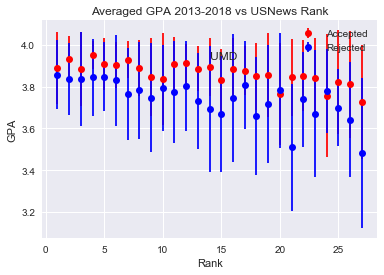

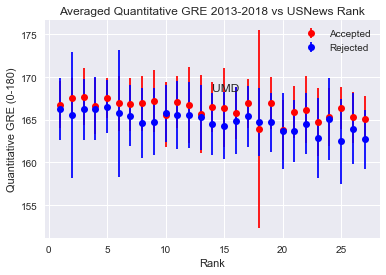

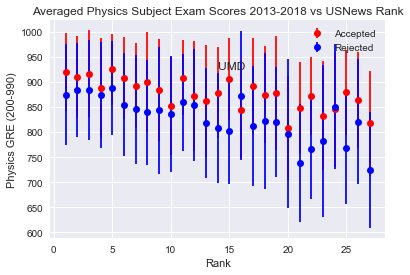

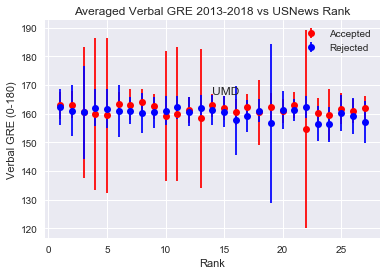

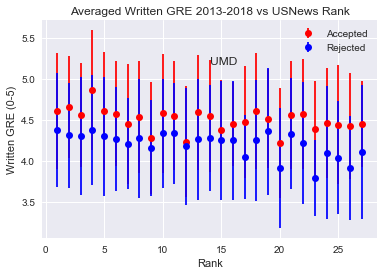

In [27]:
#Plotting
#GPA
sns.set()
plt.figure(0)
rank = np.arange(1,len(accepted_ave)+1)
plt.errorbar(rank,accepted_ave.GPA, yerr=accepted_std.GPA, fmt='ro')
plt.errorbar(rank,rejected_ave.GPA, yerr=rejected_std.GPA, fmt='bo')
plt.text(14,accepted_ave.GPA[14]+.1,'UMD')
plt.legend(["Accepted","Rejected"])
plt.title("Averaged GPA 2013-2018 vs USNews Rank")
plt.xlabel("Rank")
plt.ylabel("GPA")
plt.show()
#Quant GRE Score
plt.figure(1)
plt.errorbar(rank,accepted_ave.Q, yerr=accepted_std.Q, fmt='ro')
plt.errorbar(rank,rejected_ave.Q, yerr=rejected_std.Q, fmt='bo')
plt.text(14,accepted_ave.Q[14]+2,'UMD')
plt.legend(["Accepted","Rejected"])
plt.title("Averaged Quantitative GRE 2013-2018 vs USNews Rank")
plt.xlabel("Rank")
plt.ylabel("Quantitative GRE (0-180)")
plt.show()
#Physics GRE
plt.figure(2)
plt.errorbar(rank,accepted_ave.P, yerr=accepted_std.P, fmt='ro')
plt.errorbar(rank,rejected_ave.P, yerr=rejected_std.P, fmt='bo')
plt.text(14,accepted_ave.P[14]+20,'UMD')
plt.legend(["Accepted","Rejected"])
plt.title("Averaged Physics Subject Exam Scores 2013-2018 vs USNews Rank")
plt.xlabel("Rank")
plt.ylabel("Physics GRE (200-990)")
plt.show()
#Verbal GRE Score
plt.figure(3)
plt.errorbar(rank,accepted_ave.V, yerr=accepted_std.V, fmt='ro')
plt.errorbar(rank,rejected_ave.V, yerr=rejected_std.V, fmt='bo')
plt.text(14,accepted_ave.V[14]+5,'UMD')
plt.legend(["Accepted","Rejected"])
plt.title("Averaged Verbal GRE 2013-2018 vs USNews Rank")
plt.xlabel("Rank")
plt.ylabel("Verbal GRE (0-180)")
plt.show()
#Written GRE Score
plt.figure(4)
plt.errorbar(rank,accepted_ave.W, yerr=accepted_std.W, fmt='ro')
plt.errorbar(rank,rejected_ave.W, yerr=rejected_std.W, fmt='bo')
plt.text(14,accepted_ave.W[14]+.8,'UMD')
plt.legend(["Accepted","Rejected"])
plt.title("Averaged Written GRE 2013-2018 vs USNews Rank")
plt.xlabel("Rank")
plt.ylabel("Written GRE (0-5)")
plt.show()

#### Analysis)
Some important things can be inferred from this data. First, all the plots have a slight downward trend. This means those accepted into the top schools like MIT and Stanford have higher scores than those at the bottom end like the University of Minnesota and Penn State. So top end schools either have a stronger filter or the caliber of students that stick out in admissions due to other non numerical qualities (letters of recommendation, strong research experience, etc.) have high scores as well. 

Second, for most of the plots there is a distinction between the averaged scores of those who get accepted and those who don't. People with high scores generally get in more than those with lower scores. This means your GPA, quantitative GRE score, physics GRE score, and written GRE score (those with a stronger distiction) all play a somewhat important part in your application. However, since there is a strong overlap in the verbal GRE acceptance and rejection scores, one's verbal GRE isn't as important. This backs up the initial idea that the verbal GRE score doesn't help you once it is "high" enough.

Third, there is large variance due to the high standard deviation. This is expected as admission committees look at more than just test scores so you'd expect variations.

### Question 2) What are the distributions of physics subject exam scores for different schools?

Many people stress out over the physics subject exam (PGRE) as it is a test one can only take once or twice and yet, appears to hold a lot of weight in school admission. Let's see how important the PGRE is and school's PGRE distribution.

We'll take a look at six schools: MIT, Stanford, Cal Tech, Univ of Michigan, Univ of Maryland, and Penn State. Three at the top of the rankings, two in the mid teens, and the last one in the mid twenties. 

In [28]:
import warnings; warnings.simplefilter('ignore')

In [29]:
#PGRE data MIT:
PMIT = MIT[MIT['P'].isnull()==False]     #non empty physics GRE scores
PMIT_a = PMIT[PMIT['MIT']==True]         #accepted people 
PMIT_r = PMIT[PMIT['MIT']==False]        #rejected people

#Stanford
PStan = Stan[Stan['P'].isnull()==False]
PStan_a = PStan[PStan['MIT']==True]
PStan_r = PStan[PStan['MIT']==False]

#CalTech
PCalTech = CalTech[CalTech['P'].isnull()==False]
PCalTech_a = PCalTech[PCalTech['MIT']==True]
PCalTech_r = PCalTech[PCalTech['MIT']==False]

#PGRE data Michigan:
PUMich = UMich[UMich['P'].isnull()==False]
PUMich_a = PUMich[PUMich['MIT']==True]
PUMich_r = PUMich[PUMich['MIT']==False]

#PGRE data UMD:
PUMD = UMD[UMD['P'].isnull()==False]
PUMD_a = PUMD[PUMD['MIT']==True]
PUMD_r = PUMD[PUMD['MIT']==False]

#PGRE data Penn State
PPSU = PSU[PSU['P'].isnull()==False]
PPSU_a = PPSU[PPSU['MIT']==True]
PPSU_r = PPSU[PPSU['MIT']==False]

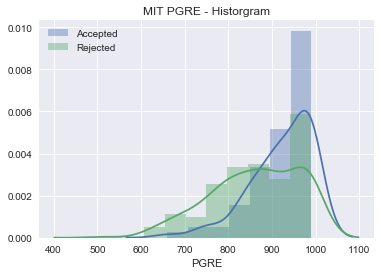

In [30]:
#MIT
sns.set()
ax = sns.distplot(PMIT_a.P)
ax = sns.distplot(PMIT_r.P)
ax.set(xlabel="PGRE",title='MIT PGRE - Historgram')
ax.legend(["Accepted","Rejected"])

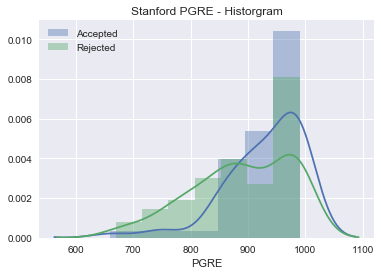

In [31]:
#Stanford
sns.set()
ax2 = sns.distplot(PStan_a.P)
ax2 = sns.distplot(PStan_r.P)
ax2.set(xlabel="PGRE",title='Stanford PGRE - Historgram')
ax2.legend(["Accepted","Rejected"])

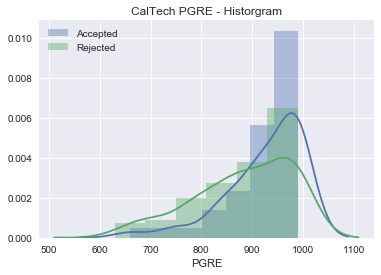

In [32]:
#CalTech
sns.set()
ax2 = sns.distplot(PCalTech_a.P)
ax2 = sns.distplot(PCalTech_r.P)
ax2.set(xlabel="PGRE",title='CalTech PGRE - Historgram')
ax2.legend(["Accepted","Rejected"])

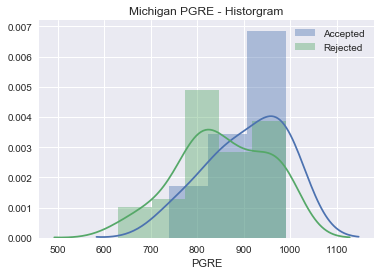

In [33]:
#Michigan
sns.set()
ax2 = sns.distplot(PUMich_a.P)
ax2 = sns.distplot(PUMich_r.P)
ax2.set(xlabel="PGRE",title='Michigan PGRE - Historgram')
ax2.legend(["Accepted","Rejected"])

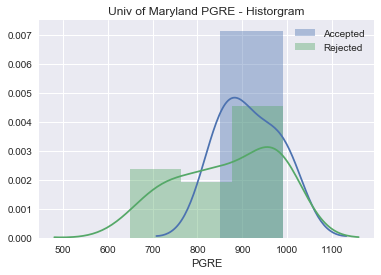

In [34]:
#Univ of Maryland
sns.set()
ax3 = sns.distplot(PUMD_a.P)
ax3 = sns.distplot(PUMD_r.P)
ax3.set(xlabel="PGRE",title='Univ of Maryland PGRE - Historgram')
ax3.legend(["Accepted","Rejected"])

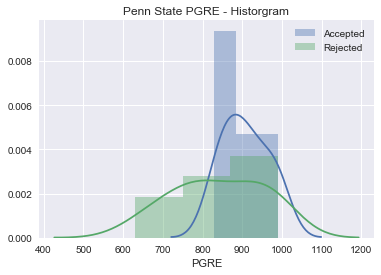

In [35]:
sns.set()
ax4 = sns.distplot(PPSU_a.P)
ax4 = sns.distplot(PPSU_r.P)
ax4.set(xlabel="PGRE",title='Penn State PGRE - Historgram')
ax4.legend(["Accepted","Rejected"])

#### Analysis)
As can be seen from the distributions that the two overlap quite a bit. There were people with high scores that both got rejected and accepted and the same with individuals with low scores. This should be reassuring to applying grad students who might be worrying about their PGRE score. Although for all schools the width of the accepted PGRE distrubition is narrower than that of the rejected. So their is evidence of a general window of acceptance schools look for applicants to land within. 

Interestingly, it can also be seen that the top programs have shifted rightward distributions so everyone who applies (regardless if they get in or not) tend to have high scores. This could be seen as a self selection/removeal process, where those who feel they don't have a chance at getting in don't apply (or as we see later a bias of the data in those that report to the website).

### Question 3) How do these do different populations score?

There is thought that international students must have higher scores than domestic students. Likewise for men vs. women. Often this is argued by a sheer number perspective. There are more international students applying for a select number of seats so admissions must be more selective. Some argue that this holds for men too. Let's see if this fantasy belief or if it plays out in data.

In [36]:
# Males and Female -> Averages
D_a = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])   #domestic accepted
I_a = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])   #international accepted
D_r = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])   #domestic rejected
I_r = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])   #international rejected

M_a = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])   #male accepted
F_a = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])   #female accepted
M_r = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])   #male rejected
F_r = pd.DataFrame(columns = ['school','GPA','MGPA','Q','V','W','P'])   #female rejected

for i,schl in enumerate(schlDF):
    #accepted people:
    schl_a = schl[schl[top25sch[i]]==True]
    #rejected people:
    schl_r = schl[schl[top25sch[i]]==False]
    
    #Due to the transition from GRE grading in 2012
    schl_a = schl_a[schl_a['Year'].astype(float)>2012]
    schl_r = schl_r[schl_r['Year'].astype(float)>2012]
    
    #temporary arrays:
    Ma2 = schl_a[schl_a['Gender'].astype(str)=="M"]
    Mr2 = schl_r[schl_r['Gender'].astype(str)=='M']
    Fa2 = schl_a[schl_a['Gender'].astype(str)=="F"]
    Fr2 = schl_r[schl_r['Gender'].astype(str)=='F']
    Da2 = schl_a[schl_a['Dom'].astype(str)=="D"]
    Dr2 = schl_r[schl_r['Dom'].astype(str)=='D']
    Ia2 = schl_a[schl_a['Dom'].astype(str)=="I"]
    Ir2 = schl_r[schl_r['Dom'].astype(str)=='I']
    
    #reducing columns to just numerical:
    columNames = ['GPA','MGPA','Q','V','W','P']
    Ma2 = Ma2[columNames]
    Mr2= Mr2[columNames]
    Fa2 = Fa2[columNames]
    Fr2= Fr2[columNames]
    Da2 = Da2[columNames]
    Dr2= Dr2[columNames]
    Ia2 = Ia2[columNames]
    Ir2= Ir2[columNames]
    
    M_a = M_a.append(Ma2.mean(), ignore_index=True)
    M_r = M_r.append(Mr2.mean(), ignore_index=True)
    F_a = F_a.append(Fa2.mean(), ignore_index=True)
    F_r = F_r.append(Fr2.mean(), ignore_index=True)
    D_a = D_a.append(Da2.mean(), ignore_index=True)
    D_r = D_r.append(Dr2.mean(), ignore_index=True)
    I_a = I_a.append(Ia2.mean(), ignore_index=True)
    I_r = I_r.append(Ir2.mean(), ignore_index=True)

    #Adding back school names:
    M_a.loc[i,'school']=top25sch[i]
    M_r.loc[i,'school']=top25sch[i]
    F_a.loc[i,'school']=top25sch[i]
    F_r.loc[i,'school']=top25sch[i]
    I_a.loc[i,'school']=top25sch[i]
    I_r.loc[i,'school']=top25sch[i]
    D_a.loc[i,'school']=top25sch[i]
    D_r.loc[i,'school']=top25sch[i]

In [37]:
#Domestic vs International:
#acceptance
df_all = pd.concat([I_a.set_index('school'), D_a.set_index('school')], 
                   axis='columns',keys=['International','Domestic'])
df_all.head(27) # looking at acceptance statistics:

International                                              \
                   GPA      MGPA           Q           V         W   
school                                                               
MIT           3.922500  3.947500  167.777778  162.777778  4.250000   
Stan          3.908750  3.967778  167.466667  161.933333  4.066667   
CalTech       3.913750  3.993750  168.437500  163.000000  4.176471   
Harv          3.975714  3.990000  166.571429  161.714286  4.285714   
Princ         3.954000  3.964000  169.111111  164.111111  4.300000   
UCB           3.918000  3.962000  168.000000  162.272727  4.166667   
Corn          3.934286  3.948571  167.277778  164.666667  4.222222   
UChic         3.905000  3.912857  167.923077  161.692308  4.250000   
UIUC          3.921818  3.930000  169.384615  160.846154  4.115385   
Columbia      3.636667  3.724000  164.500000  160.000000  4.166667   
UCSB          3.872500  3.877500  168.375000  160.750000  4.000000   
Yale          3.920000  3.923333  170.333333  160.000000  3.785714   
UMich         3.921167  3.941667  167.285714  162.857143  4.214286   
UCBoul        3.816000  3.870000  166.600000  161.600000  4.350000   
UMD           3.836667  3.933333  169.444444  158.777778  4.222222   
UPenn         3.930000  3.913333  166.200000  161.400000  4.000000   
JHopk         3.916667  3.966667  167.857143  161.142857  4.000000   
UCLA          3.910000  3.890000  168.000000  158.000000  4.500000   
UCSD          3.948000  3.934000  168.166667  159.333333  4.250000   
UTex               NaN  3.200000  169.000000  154.500000  3.250000   
UWMad         3.910000  3.890000  169.000000  157.500000  4.250000   
UWash         3.975000  3.945000  168.666667  163.666667  4.833333   
OSU           3.952000  3.825000  165.000000  157.444444  4.000000   
Stony         3.490000  3.393333  167.142857  152.000000  3.916667   
NW            3.650000  3.350000  167.200000  163.200000  4.100000   
PSU           3.903333  3.875000  165.900000  160.100000  4.227273   
UMinn              NaN       NaN  167.500000  160.500000  3.750000   

                      Domestic                                              \
                   P       GPA      MGPA           Q           V         W   
school                                                                       
MIT       962.000000  3.867318  3.936136  166.400000  163.280000  4.729167   
Stan      962.000000  3.939643  3.952143  167.290323  163.774194  4.766667   
CalTech   960.000000  3.873478  3.948571  167.320000  164.560000  4.700000   
Harv      954.285714  3.955556  3.941667  166.954545  164.454545  4.863636   
Princ     946.000000  3.896158  3.907632  167.095238  163.333333  4.600000   
UCB       971.666667  3.893333  3.914722  166.948718  163.871795  4.615385   
Corn      940.588235  3.936275  3.937647  166.653846  162.942308  4.528846   
UChic     960.000000  3.897368  3.929412  166.166667  165.666667  4.736842   
UIUC      943.076923  3.820667  3.877586  166.266667  163.400000  4.366667   
Columbia  875.000000  3.854917  3.907095  165.821429  163.357143  4.648148   
UCSB      945.000000  3.918143  3.932107  167.129032  164.032258  4.629032   
Yale      935.714286  3.911579  3.944118  165.833333  161.444444  4.368421   
UMich     985.714286  3.872286  3.901852  164.862069  161.448276  4.616667   
UCBoul    906.000000  3.903333  3.929149  166.660000  163.280000  4.567308   
UMD       972.222222  3.808222  3.875562  165.777778  162.500000  4.333333   
UPenn     936.000000  3.867333  3.927857  165.400000  160.466667  4.500000   
JHopk     960.000000  3.861875  3.894667  166.466667  163.400000  4.700000   
UCLA      990.000000  3.831324  3.859257  165.029412  162.029412  4.632353   
UCSD      965.000000  3.814375  3.831875  165.733333  162.800000  4.366667   
UTex      900.000000  3.764000  3.773077  163.125000  161.812500  4.343750   
UWMad     955.000000  3.838156  3.863167  165.454545  163.242424  4.590909   
UWash     913.333333  3.833750  3.82

In [38]:
#Male vs Female:
#acceptance
df_all = pd.concat([M_a.set_index('school'), F_a.set_index('school')], 
                   axis='columns',keys=['Male','Female'])
df_all.head(27) # looking at acceptance statistics:

Male                                                          \
               GPA      MGPA           Q           V         W           P   
school                                                                       
MIT       3.844789  3.927105  166.769231  161.192308  4.557692  914.615385   
Stan      3.921724  3.951034  167.514286  161.828571  4.588235  918.000000   
CalTech   3.861364  3.959524  167.689655  163.103448  4.483333  925.333333   
Harv      3.952857  3.962143  166.133333  162.200000  4.933333  887.333333   
Princ     3.917462  3.928846  167.133333  162.466667  4.400000  942.500000   
UCB       3.896875  3.883125  167.289474  163.131579  4.576923  910.000000   
Corn      3.937619  3.959000  166.909091  162.909091  4.465909  911.111111   
UChic     3.887895  3.920000  167.363636  163.136364  4.541667  920.869565   
UIUC      3.881481  3.915185  167.692308  162.500000  4.288462  918.518519   
Columbia  3.825520  3.882130  165.928571  161.642857  4.555556  885.769231   
UCSB      3.899478  3.919957  167.703704  163.333333  4.518519  928.518519   
Yale      3.928125  3.951875  166.900000  161.750000  4.227273  894.285714   
UMich     3.898250  3.919630  165.862069  161.724138  4.637931  882.333333   
UCBoul    3.913000  3.933750  166.933333  163.177778  4.510638  890.652174   
UMD       3.815400  3.895211  166.782609  161.565217  4.326087  920.869565   
UPenn     3.903846  3.934615  165.857143  160.071429  4.428571  840.000000   
JHopk     3.875000  3.895455  166.583333  161.583333  4.625000  925.833333   
UCLA      3.835000  3.871097  165.612903  161.387097  4.693548  875.806452   
UCSD      3.820000  3.836250  166.894737  162.157895  4.552632  902.631579   
UTex      3.849000  3.882500  164.250000  161.750000  4.333333  807.500000   
UWMad     3.840440  3.878125  165.888889  163.259259  4.574074  861.481481   
UWash     3.891429  3.910714  166.571429  162.142857  4.642857  882.857143   
OSU       3.823939  3.858333  164.941176  160.696970  4.413529  852.187500   
Stony     3.802308  3.822800  166.125000  160.562500  4.548387  864.838710   
NW        3.801429  3.958571  166.454545  162.909091  4.681818  904.545455   
PSU       3.841034  3.873448  165.437500  161.156250  4.500000  879.117647   
UMinn     3.712727  3.805455  164.900000  160.600000  4.550909  842.000000   

            Female                                                          
               GPA      MGPA           Q           V         W           P  
school                                                                      
MIT       3.948000  3.959000  167.200000  165.300000  4.600000  903.000000  
Stan      3.975000  3.958571  166.900000  165.300000  4.500000  872.000000  
CalTech   3.910000  3.927500  167.363636  150.000000  4.450000  859.090909  
Harv      3.958889  3.950000  167.250000  151.416667  4.590909  865.833333  
Princ     3.868889  3.901250  167.700000  148.500000  4.555556  888.000000  
UCB       3.936154  3.950769  167.230769  165.076923  4.615385  896.153846  
Corn      3.916000  3.914667  166.450000  162.700000  4.325000  850.500000  
UChic     3.834286  3.865000  166.125000  165.375000  4.562500  853.750000  
UIUC      3.830000  3.847000  166.916667  163.333333  4.416667  817.500000  
Columbia  3.870000  3.902857  164.600000  152.466667  4.571429  796.666667  
UCSB      3.925556  3.900000  166.250000  149.416667  4.409091  851.666667  
Yale      3.896000  3.953333  166.800000  157.400000  4.300000  718.000000  
UMich     3.845714  3.861667  167.285714  141.142857  4.714286  788.571429  
UCBoul    3.897273  3.901818  166.714286  162.071429  4.714286  838.461538  
UMD       3.826000  3.855000  168.333333  161.500000  4.500000  855.000000  
UPenn     3.900000  4.000000  163.800000  162.400000  4.400000  835.000000  
JHopk     3.862857  3.911667  167.285714  164.142857  4.285714  822.857143  
UCLA      3.858333  3.803333  162.666667  162.333333  4.416667  806.666667  
UCSD      3.942500  3.947500  165.750000  162.250000  3.

#### Analysis)
As can be seen when you study the numbers there might be some data supporting a slight disadvatage for international vs domestic students, but not much of an argument can be made that women have an advantage over men. For those that get accepted international students on average have higher GPA's and test scores than domestic students. This points to a higher standard they are judged by. What this doesn't compare though is similar degrees of education. Many international students come in with a higher level of education (more rigourous undergrad or masters degree) than domestic students. 

Within the top schools the women who are accepted have a higher GPA and general GRE scores. It's only the PGRE that men appear to have higher scores than women. This can be seen below:

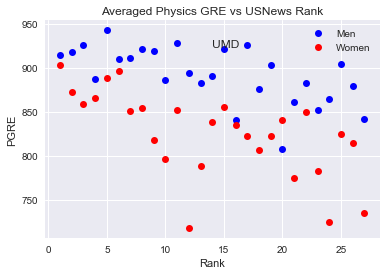

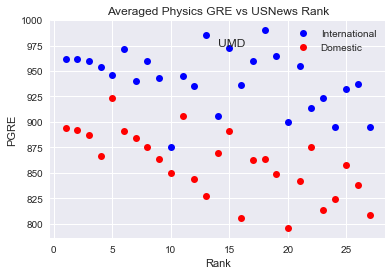

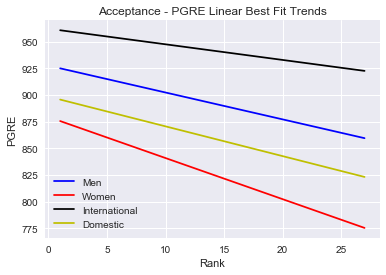

In [61]:
#Visually:
plt.figure(0)
plt.plot(rank,M_a.P,'bo',rank,F_a.P,'ro')
plt.text(14,M_a.P[14]+2,'UMD')
plt.legend(["Men","Women"])
plt.title("Averaged Physics GRE vs USNews Rank"); plt.xlabel("Rank"); plt.ylabel("PGRE")
plt.figure(1)
plt.plot(rank,I_a.P,'bo',rank,D_a.P,'ro')
plt.text(14,I_a.P[14]+2,'UMD')
plt.legend(["International","Domestic"])
plt.title("Averaged Physics GRE vs USNews Rank"); plt.xlabel("Rank"); plt.ylabel("PGRE")
plt.show()
plt.figure(2)
plt.title('Acceptance - PGRE Linear Best Fit Trends'); plt.xlabel("Rank"); plt.ylabel("PGRE")
pM = np.poly1d(np.polyfit(rank,M_a.P, 1))
pF = np.poly1d(np.polyfit(rank,F_a.P, 1))
pI = np.poly1d(np.polyfit(rank,I_a.P, 1))
pD = np.poly1d(np.polyfit(rank,D_a.P, 1))
plt.plot(rank,pM(rank),'b',rank,pF(rank),'r',rank,pI(rank),'k',rank,pD(rank),'y')
plt.legend(["Men","Women","International","Domestic"])
plt.show()

As we determined above though, PGRE is not a good indicator of those who will get accepted vs rejected. So its unclear from this data if gender matters. 

### Question 4) Is this data biased?

We've started analyzing this data, but have yet to ask the question if this data is biased. 

One way to find is from comparing a school's reported admission percentage to our data's admission percentage. From looking at the forum it initially appears that only top caliber students do the reporting, or those students who have admission success. If this is true than the admission percentage seen in our data should be larger than the admission percentage reported by each school.

In [40]:
#calculating rate of acceptance into top 25 schools
for i,schl in enumerate(schlDF):
    accepted_ave.loc[i,'webRate']=schl[schl[top25sch[i]]==True].GPA.size/schl.GPA.size
    rejected_ave.loc[i,'webRate']=schl[schl[top25sch[i]]==False].GPA.size/schl.GPA.size

These acceptance/rejection rates can be compared to the official numbers given out by the departments. The website grad school shopper gives a list of most of our top 25 schools. Link: https://www.gradschoolshopper.com/gradschool/rankby.jsp?q=2&cid=3

In [41]:
accepted_ave.loc[0,'trueRate'] = 9.33/100   #MIT
accepted_ave.loc[1,'trueRate'] = 9.84/100   #Stanford
accepted_ave.loc[3,'trueRate'] = 11.70/100  #Harvard
accepted_ave.loc[4,'trueRate'] = 10.59/100  #Princeton
accepted_ave.loc[5,'trueRate'] = 14.14/100  #Univ of Cal - Berkeley
accepted_ave.loc[6,'trueRate'] = 20.07/100  #Cornell 
accepted_ave.loc[7,'trueRate'] = 14.80/100  #Univ of Chicago 
accepted_ave.loc[8,'trueRate'] = 24.31/100  #Univ of Illinois - Urbana Champ
accepted_ave.loc[9,'trueRate'] = 8.47/100   #Columbia Univ
accepted_ave.loc[10,'trueRate'] = 18.55/100 #UC - Santa Barbara
accepted_ave.loc[13,'trueRate'] = 25.06/100 #Univ of Colorado - Boulder
accepted_ave.loc[15,'trueRate'] = 10.17/100 #UPenn
accepted_ave.loc[18,'trueRate'] = 26.54/100 #Univ of Cal - San Diego
accepted_ave.loc[19,'trueRate'] = 21.54/100 #Univ of Texas - Austin
accepted_ave.loc[20,'trueRate'] = 25.82/100 #Univ of Wisconsin - Madison
accepted_ave.loc[21,'trueRate'] = 18.07/100 #Univ of Washington
accepted_ave.loc[22,'trueRate'] = 32.05/100 #Ohio State
accepted_ave.loc[23,'trueRate'] = 15.48/100 #Stony Brook
accepted_ave.loc[24,'trueRate'] = 15.96/100 #Northwestern
accepted_ave.loc[25,'trueRate'] = 24.32/100 #Penn State

In [42]:
#Listing rates side by side
accepted_ave[['school','webRate','trueRate']]

,school,webRate,trueRate
0,MIT,0.254286,0.0933
1,Stan,0.269022,0.0984
2,CalTech,0.331034,NaN
3,Harv,0.212389,0.1170
4,Princ,0.212418,0.1059
5,UCB,0.336088,0.1414
6,Corn,0.510067,0.2007
7,UChic,0.315385,0.1480
8,UIUC,0.545455,0.2431
9,Columbia,0.403292,0.0847


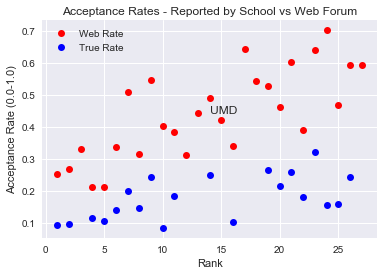

In [63]:
#Visually seeing the disparity
plt.plot(rank,accepted_ave.webRate,'ro',rank,accepted_ave.trueRate,'bo')
plt.text(14,accepted_ave.webRate[14]+.02,'UMD')
plt.legend(['Web Rate','True Rate'])
plt.title('Acceptance Rates - Reported by School vs Web Forum')
plt.xlabel('Rank') ; plt.ylabel('Acceptance Rate (0.0-1.0)')
plt.show()

Although not every school reported admission data, we can see there is a significant difference between what was reported and what is seen by each school that did. Since the physicsgre website reports a higher acceptance rate for every school that means the posters tend to be of higher caliber than those that don't (these are the students that get in). Therefore the data is biased in that only the top half of the election pool reports their results and should be analyzed with this in mind. This could also shine light on why certain demographics appear to perform better than others. There are large groups of people who don't report and this causes shifts in the statistics that might otherewise not be there or be reduced.

### Question 5) How do school admissions change with time?

One criteria for school prestige is admission selectivity. A larger applicant pool for few spots, indicates that your program is desireable to attend. For long lasting top schools like MIT, Stanford, Harvard, etc. we'd expect their admissions to have remained the same over the ten year spread. However, we'd expect some schools towards the end of the top 25 list to potentially be trending up or down.

In [89]:
#Grabbing years used within data:
years = pd.Series.drop_duplicates(stats.Year).values
years = sorted(years, reverse=False) #Reverse sorting to begin at 2009

In [165]:
#Sorting by year and school and averaging numerical statistics
YearsSchlDFlist = []
for i, schlname in enumerate(top25sch):
    YearsSchlDFlist.append(stats.groupby(['Year',schlname]).mean())

In [239]:
#Example of first entry (MIT)
YearsSchlDFlist[0]

GPA      MGPA           Q           V         W           P
Year MIT                                                                    
2009 False  3.811667  3.836667  790.909091  624.545455  4.818182  841.428571
     True   3.794545  3.895833  793.846154  651.538462  5.153846  923.076923
2010 False  3.762963  3.783200  788.181818  617.272727  4.687500  834.333333
     True   3.822500  3.887500  792.000000  562.000000  4.100000  944.000000
2011 False  3.775500  3.786000  791.666667  625.200000  4.700000  835.600000
     True   3.798462  3.905833  799.333333  600.000000  4.700000  928.571429
2012 False  3.668889  3.711176  772.222222  611.111111  4.725000  854.000000
     True   3.825000  3.865000  790.000000  635.000000  4.700000  918.000000
2013 False  3.915526  3.941667  165.956522  161.608696  4.413043  876.521739
     True   3.924000  3.960000  167.000000  161.428571  4.562500  930.000000
2014 False  3.761765  3.690667  166.416667  163.583333  4.500000  860.400000
     True   3.977500  3.992500  168.285714  162.714286  4.571429  931.428571
2015 False  3.908333  3.900769  166.363636  162.727273  4.045455  899.090909
     True   3.896667  3.960000  167.333333  159.000000  4.500000  873.333333
2016 False  3.816273  3.848950  166.076923  163.115385  4.346154  869.166667
     True   3.948333  3.975000  166.285714  164.285714  4.428571  937.142857
2017 False  3.857419  3.862500  166.925000  162.500000  4.237500  875.945946
     True   3.814889  3.942222  166.250000  164.583333  4.625000  944.166667
2018 False  3.895708  3.931905  165.785714  161.034483  4.607143  878.928571
     True   3.868375  3.890625  166.400000  162.600000  4.800000  868.888889

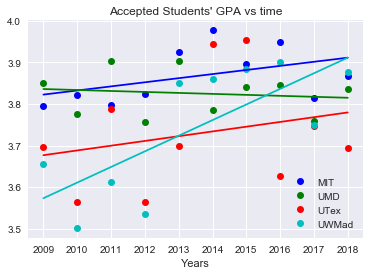

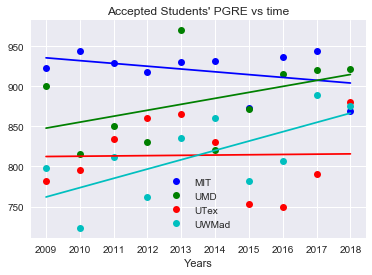

In [238]:
#plotting acceptance trends:
indSch = [0,14,19,20]   # select schools to declutter graph
colorarr = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
schlist = [top25sch[i] for i in indSch]
for j,i in enumerate(indSch):
    plt.figure(0)
    plt.plot(years,YearsSchlDFlist[i].GPA.values[1::2],'o',color=colorarr[j])
    plt.figure(1)
    plt.plot(years,YearsSchlDFlist[i].P.values[1::2],'o',color=colorarr[j])
    
for j,i in enumerate(indSch):
    plt.figure(0)
    z = np.polyfit(np.arange(2009,2019,1),YearsSchlDFlist[i].GPA.values[1::2], 1)
    p = np.poly1d(z)
    plt.plot(years,p(np.arange(2009,2019,1)),color=colorarr[j])
    
    z = np.polyfit(np.arange(2009,2019,1),YearsSchlDFlist[i].P.values[1::2], 1)
    p = np.poly1d(z)
    plt.figure(1)
    plt.plot(years,p(np.arange(2009,2019,1)),color=colorarr[j])

plt.figure(0)
plt.title("Accepted Students' GPA vs time");plt.xlabel('Years');plt.legend(schlist)
plt.figure(1)
plt.title("Accepted Students' PGRE vs time");plt.xlabel('Years');plt.legend(schlist)
plt.show()

In [250]:
YearsSchlDFlist[19].GPA.values[0::2]

array([3.50857143, 3.395     , 3.57      , 3.825     , 3.92      ,
              nan, 3.98666667, 3.6       , 3.725     , 4.        ])

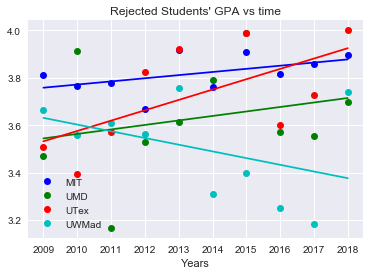

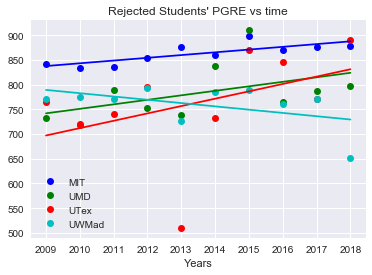

In [251]:
#plotting rejection trends:
yearsnum = np.arange(2009,2019,1)
for j,i in enumerate(indSch):
    plt.figure(0)
    plt.plot(years,YearsSchlDFlist[i].GPA.values[0::2],'o',color=colorarr[j])
    plt.figure(1)
    plt.plot(years,YearsSchlDFlist[i].P.values[0::2],'o',color=colorarr[j])
    
for j,i in enumerate(indSch):
    plt.figure(0)
    temp = YearsSchlDFlist[i].GPA.values[0::2]; idx = np.isfinite(temp)
    z = np.polyfit(yearsnum[idx],temp[idx], 1)
    p = np.poly1d(z)
    plt.plot(years,p(np.arange(2009,2019,1)),color=colorarr[j])
    
    temp = YearsSchlDFlist[i].P.values[0::2]; idx = np.isfinite(temp)
    z = np.polyfit(yearsnum[idx],temp[idx], 1)
    p = np.poly1d(z)
    plt.figure(1)
    plt.plot(years,p(np.arange(2009,2019,1)),color=colorarr[j])

plt.figure(0)
plt.title("Rejected Students' GPA vs time");plt.xlabel('Years');plt.legend(schlist)
plt.figure(1)
plt.title("Rejected Students' PGRE vs time");plt.xlabel('Years');plt.legend(schlist)
plt.show()

#### Analysis

add analysis and trends in admission/rejection percentage (we know this is biased, but similar biases should be present across the years)

Future work - add machine learning to data (or someother statistical fit) to predict degree of confidence if a new (made-up) individual would get into a certain program with their test scores, GPA, and background. 

## Conclusion

Within this assignment we were interested in what matters for admission into physics grad school. On the website www.physicsgre.com there is a forum where people can enter in their academic profile and update it as they get accepted or rejected into the grad schools they applied for. Each post within this forum is fairly well structured allowing us to extract the users data fairly easily.

After we accessed the data we wanted to determine information trends in the top 25 schools, determined by US News ranking. We found there is a lot of variation in all the numerical quantities that determine who gets accepted or rejected (seen in large error bars of plot one). The PGRE distributions also show that there are large overlaps between those who get accepted and rejected. These point to the fact that there is much more to a person's application then their raw numbers. Their letters of recommendation, research experience, connections to department, and statement of purpose are probably much more important and aren't accounted for here.

Also while there isn't much of a difference between international vs domestic and men vs women applicants there is an interesting barrier in how they perform on the physics subject exam. This could be due to how the test is structured and possible different levels of preparation going into the exam that might benefit different groups more than others.

But all of our results should be viewed carefully as the data is biased towards only those who are successful in getting into grad school.